line plots

In [1]:
df <- EuStockMarkets

In [2]:
print(df)

Time Series:
Start = c(1991, 130) 
End = c(1998, 169) 
Frequency = 260 
             DAX    SMI    CAC   FTSE
1991.496 1628.75 1678.1 1772.8 2443.6
1991.500 1613.63 1688.5 1750.5 2460.2
1991.504 1606.51 1678.6 1718.0 2448.2
1991.508 1621.04 1684.1 1708.1 2470.4
1991.512 1618.16 1686.6 1723.1 2484.7
1991.515 1610.61 1671.6 1714.3 2466.8
1991.519 1630.75 1682.9 1734.5 2487.9
1991.523 1640.17 1703.6 1757.4 2508.4
1991.527 1635.47 1697.5 1754.0 2510.5
1991.531 1645.89 1716.3 1754.3 2497.4
1991.535 1647.84 1723.8 1759.8 2532.5
1991.538 1638.35 1730.5 1755.5 2556.8
1991.542 1629.93 1727.4 1758.1 2561.0
1991.546 1621.49 1733.3 1757.5 2547.3
1991.550 1624.74 1734.0 1763.5 2541.5
1991.554 1627.63 1728.3 1762.8 2558.5
1991.558 1631.99 1737.1 1768.9 2587.9
1991.562 1621.18 1723.1 1778.1 2580.5
1991.565 1613.42 1723.6 1780.1 2579.6
1991.569 1604.95 1719.0 1767.7 2589.3
1991.573 1605.75 1721.2 1757.9 2595.0
1991.577 1616.67 1725.3 1756.6 2595.6
1991.581 1619.29 1727.2 1754.7 2588.8
1991.585 1620.49

In [3]:
summary(df)

      DAX            SMI            CAC            FTSE     
 Min.   :1402   Min.   :1587   Min.   :1611   Min.   :2281  
 1st Qu.:1744   1st Qu.:2166   1st Qu.:1875   1st Qu.:2843  
 Median :2141   Median :2796   Median :1992   Median :3247  
 Mean   :2531   Mean   :3376   Mean   :2228   Mean   :3566  
 3rd Qu.:2722   3rd Qu.:3812   3rd Qu.:2274   3rd Qu.:3994  
 Max.   :6186   Max.   :8412   Max.   :4388   Max.   :6179  

In [4]:
library(ggplot2)

In [5]:
EuStockDF <- as.data.frame(df)
EuStockDF$Date <- as.numeric(time(df))
head(EuStockDF)

,DAX,SMI,CAC,FTSE,Date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1628.75,1678.1,1772.8,2443.6,1991.496
2,1613.63,1688.5,1750.5,2460.2,1991.500
3,1606.51,1678.6,1718.0,2448.2,1991.504
4,1621.04,1684.1,1708.1,2470.4,1991.508
5,1618.16,1686.6,1723.1,2484.7,1991.512
6,1610.61,1671.6,1714.3,2466.8,1991.515


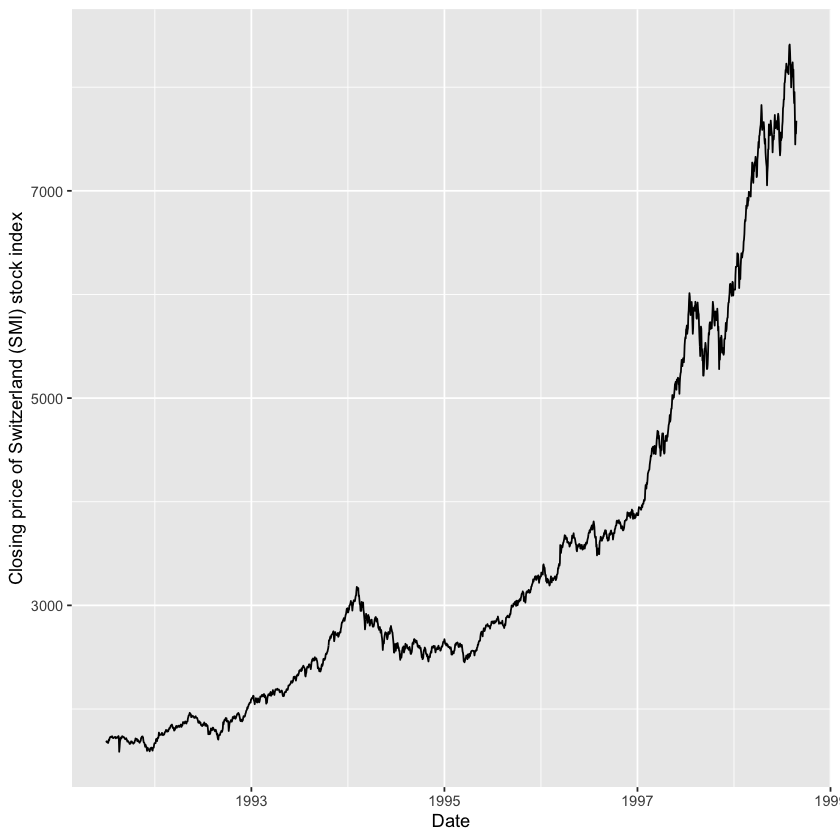

In [6]:
pl <- ggplot(EuStockDF, aes(x = Date, y = SMI)) + geom_line() + labs(y = "Closing price of Switzerland (SMI) stock index")
print(pl)

multiple line plots

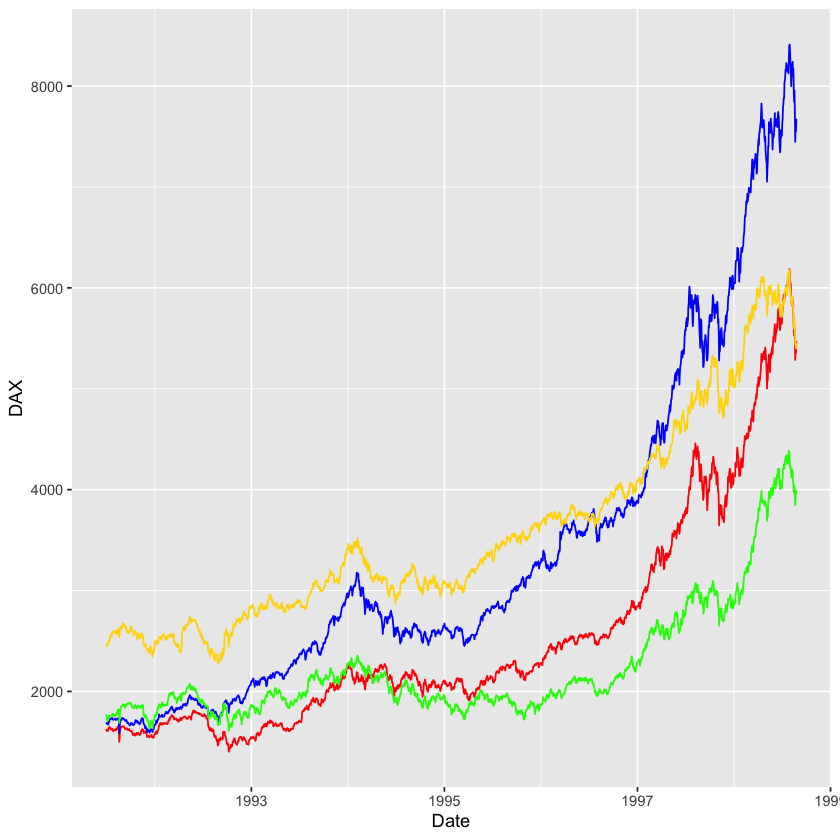

In [7]:
pl <- ggplot(EuStockDF, aes(x = Date)) +
geom_line(aes(y = DAX), color = "red") +
geom_line(aes(y = SMI), color = "blue") +
geom_line(aes(y = CAC), color = "green") +
geom_line(aes(y = FTSE), color = "gold") 

print(pl)

In [8]:
head(df)

DAX,SMI,CAC,FTSE
1628.75,1678.1,1772.8,2443.6
1613.63,1688.5,1750.5,2460.2
1606.51,1678.6,1718.0,2448.2
1621.04,1684.1,1708.1,2470.4
1618.16,1686.6,1723.1,2484.7
1610.61,1671.6,1714.3,2466.8


In [11]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [12]:
library(broom)

In [13]:
tidy_stocks <- tidy(df) %>% 
rename(Date = index, 
        Stock_Index = series, 
        Price = value)

In [14]:
print(head(tidy_stocks))

# A tibble: 6 × 3
   Date Stock_Index Price
  <dbl> <chr>       <dbl>
1 1991. DAX         1629.
2 1991. SMI         1678.
3 1991. CAC         1773.
4 1991. FTSE        2444.
5 1992. DAX         1614.
6 1992. SMI         1688.


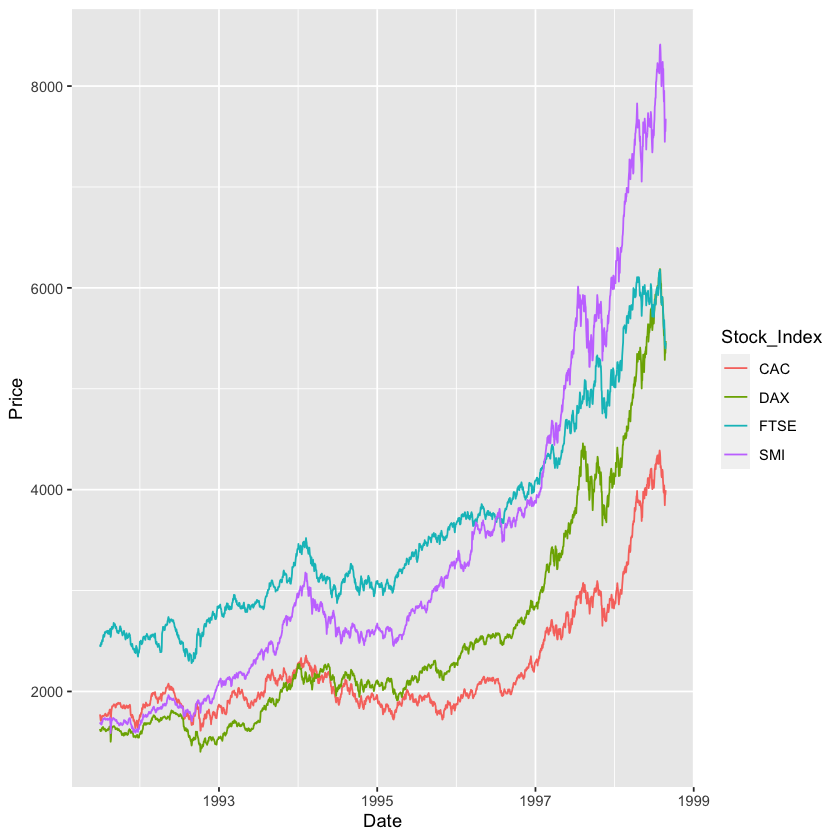

In [16]:
pl <- ggplot(tidy_stocks, aes(x = Date, y = Price)) + geom_line(aes(color = Stock_Index))
print(pl)